In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn import cluster

## Loading the Dataset

In [2]:
df = pd.read_csv('E:\SmartInternz AI ML\Dataset\Mall_Customers.csv')
df.sample(5)

,CustomerID,Gender,Age,Annual_Income,Spending_Score(1-100)
136,137,Female,44,73,7
18,19,Male,52,23,29
26,27,Female,45,28,32
177,178,Male,27,88,69
183,184,Female,29,98,88


## Descriptive Statistics

In [3]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.shape

(200, 5)

## Checking for Missing Values

In [5]:
df.isnull().any()

CustomerID               False
Gender                   False
Age                      False
Annual_Income            False
Spending_Score(1-100)    False
dtype: bool

In [6]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Outliers Detection

<Axes: >

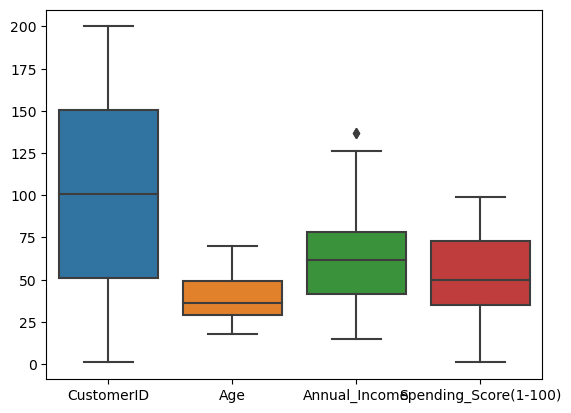

In [7]:
sns.boxplot(df)

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income',
       'Spending_Score(1-100)'],
      dtype='object')

<Axes: >

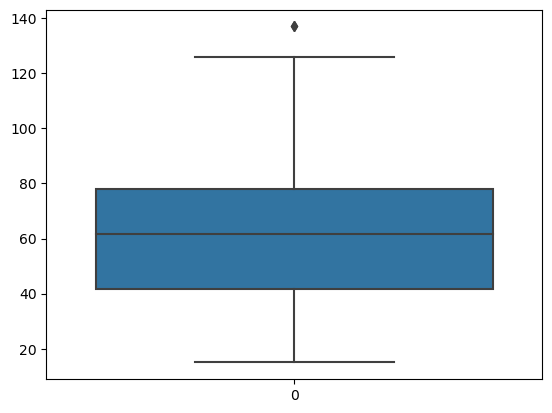

In [9]:
sns.boxplot(df.Annual_Income)

In [10]:
p99 = df.Annual_Income.quantile(0.99)
p99

126.1099999999999

In [11]:
df = df[df.Annual_Income<=p99]

<Axes: >

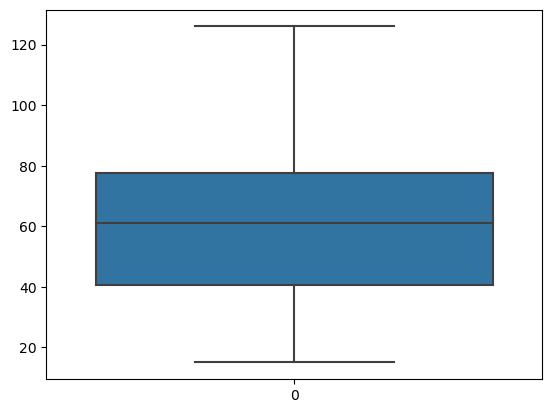

In [12]:
sns.boxplot(df.Annual_Income)

In [13]:
df.isnull().any()

CustomerID               False
Gender                   False
Age                      False
Annual_Income            False
Spending_Score(1-100)    False
dtype: bool

In [14]:
df.isnull().sum()

CustomerID               0
Gender                   0
Age                      0
Annual_Income            0
Spending_Score(1-100)    0
dtype: int64

## Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
df.Gender = le.fit_transform(df.Gender)

In [18]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score(1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   CustomerID             198 non-null    int64
 1   Gender                 198 non-null    int32
 2   Age                    198 non-null    int64
 3   Annual_Income          198 non-null    int64
 4   Spending_Score(1-100)  198 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 16.6 KB


## Unsupervised K-Means Clustering

In [20]:
from sklearn.cluster import KMeans

In [21]:
error = []
for i in range(1,11):
    kmeans = cluster.KMeans(n_clusters=i, init = 'k-means++', random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

E:\Software\Anaconda\New\envs\VITB\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Software\Anaconda\New\envs\VITB\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Software\Anaconda\New\envs\VITB\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Software\Anaconda\New\envs\VITB\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

In [22]:
error

[941667.5656565656,
 373539.5555555555,
 262201.95437100215,
 187479.30279164785,
 149699.07571152455,
 115362.10489911566,
 97739.71631016044,
 82429.1906672447,
 73237.06359420918,
 65297.54664307828]

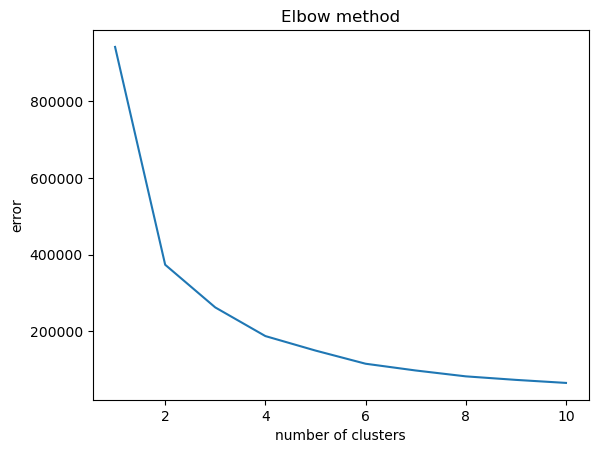

In [23]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [24]:
km_model = cluster.KMeans(n_clusters=3,init = 'k-means++',random_state=0)

In [25]:
km_model.fit(df)

E:\Software\Anaconda\New\envs\VITB\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Software\Anaconda\New\envs\VITB\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [26]:
pred = km_model.predict(df)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Scaling Data

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
scale =MinMaxScaler()

In [28]:
cols_to_scale = ['Annual_Income', 'Spending_Score(1-100)']

In [29]:
ct = ColumnTransformer(
    transformers=[
        ('MinMaxScaler', MinMaxScaler(), cols_to_scale)
    ], remainder='passthrough'
)

In [30]:
df_scaled = ct.fit_transform(df)

In [31]:
df_scaled

array([[0.00000000e+00, 3.87755102e-01, 1.00000000e+00, 1.00000000e+00,
        1.90000000e+01],
       [0.00000000e+00, 8.16326531e-01, 2.00000000e+00, 1.00000000e+00,
        2.10000000e+01],
       [9.00900901e-03, 5.10204082e-02, 3.00000000e+00, 0.00000000e+00,
        2.00000000e+01],
       [9.00900901e-03, 7.75510204e-01, 4.00000000e+00, 0.00000000e+00,
        2.30000000e+01],
       [1.80180180e-02, 3.97959184e-01, 5.00000000e+00, 0.00000000e+00,
        3.10000000e+01],
       [1.80180180e-02, 7.65306122e-01, 6.00000000e+00, 0.00000000e+00,
        2.20000000e+01],
       [2.70270270e-02, 5.10204082e-02, 7.00000000e+00, 0.00000000e+00,
        3.50000000e+01],
       [2.70270270e-02, 9.48979592e-01, 8.00000000e+00, 0.00000000e+00,
        2.30000000e+01],
       [3.60360360e-02, 2.04081633e-02, 9.00000000e+00, 1.00000000e+00,
        6.40000000e+01],
       [3.60360360e-02, 7.24489796e-01, 1.00000000e+01, 0.00000000e+00,
        3.00000000e+01],
       [3.60360360e-02, 1.3265

In [32]:
error_scaled= []
for i in range(1,11):
    kmeans = cluster.KMeans(n_clusters=i, init = 'k-means++', random_state=0)
    kmeans.fit(df_scaled)
    error_scaled.append(kmeans.inertia_)

E:\Software\Anaconda\New\envs\VITB\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Software\Anaconda\New\envs\VITB\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Software\Anaconda\New\envs\VITB\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Software\Anaconda\New\envs\VITB\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

In [33]:
error_scaled

[685626.937839837,
 200264.45693065968,
 109286.89811966066,
 76648.4067155204,
 61655.08011879002,
 51582.55334745083,
 43066.14152015538,
 36481.360046374844,
 31014.56870965635,
 27543.754768323473]

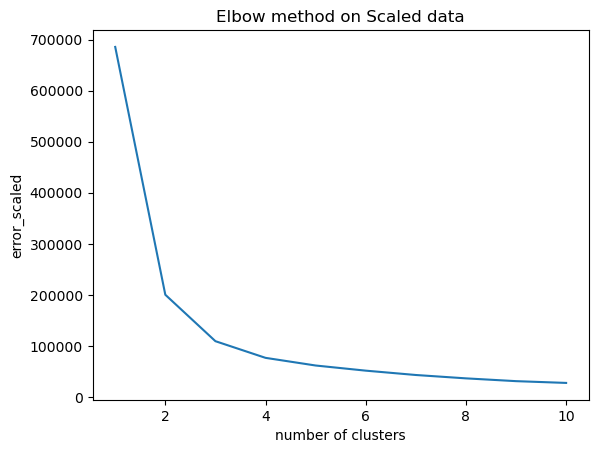

In [35]:
plt.plot(range(1,11),error_scaled)
plt.title('Elbow method on Scaled data')
plt.xlabel('number of clusters')
plt.ylabel('error_scaled')
plt.show()

In [36]:
km_model1 = cluster.KMeans(n_clusters=3,init = 'k-means++',random_state=0)

In [37]:
km_model1.fit(df_scaled)

E:\Software\Anaconda\New\envs\VITB\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Software\Anaconda\New\envs\VITB\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [38]:
pred1 = km_model1.predict(df_scaled)
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Visualizing the data

In [40]:
df['Cluster'] = pred1
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score(1-100),Cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
193,194,0,38,113,91,0
194,195,0,47,120,16,0
195,196,0,35,120,79,0
196,197,0,45,126,28,0


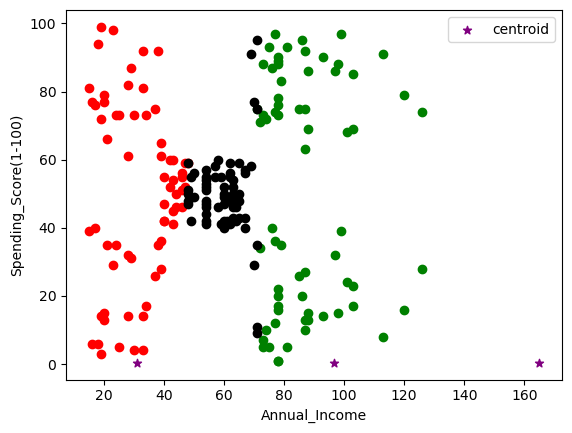

In [41]:
df1 = df[df.Cluster==0] 
df2 = df[df.Cluster==1] 
df3 = df[df.Cluster==2]
plt.scatter(df1['Annual_Income'],df1['Spending_Score(1-100)'],color='green')
plt.scatter(df2['Annual_Income'],df2['Spending_Score(1-100)'],color='red')
plt.scatter(df3['Annual_Income'],df3['Spending_Score(1-100)'],color='black')
plt.scatter(km_model.cluster_centers_[:,0],km_model.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score(1-100)')
plt.legend()

## Predicting Unknown Value

In [42]:
km_model.predict([[201,1,43,50,88]])

E:\Software\Anaconda\New\envs\VITB\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

In [43]:
km_model.predict([[68,1,19,48,60]])

E:\Software\Anaconda\New\envs\VITB\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])